In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [9]:
def model(y, t, screening=False):
    # Unpack variables
    Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = y

    # Calculate time-dependent beta
    beta = beta0 * (1 + eta * np.cos(omega * (t + phi_s)))

    # Define the equations
    dSb = -a * Sb - beta / N * Sb * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - beta / N * Sb * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) + mu * (N - Sb)
    dIb1 = -a * Ib1 + beta / N * Sb * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * Ib1
    dIb2 = -a * Ib2 + beta / N * Sb * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) - (gamma + mu) * Ib2
    dRb1 = -a * Rb1 + gamma * Ib1 - (alpha + mu) * Rb1
    dRb2 = -a * Rb2 + gamma * Ib2 - (alpha + mu) * Rb2
    dSb1 = -a * Sb1 - beta / N * Sb1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) + alpha * Rb1 - mu * Sb1
    dSb2 = -a * Sb2 - beta / N * Sb2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) + alpha * Rb2 - mu * Sb2
    dIb12 = -a * Ib12 + beta / N * Sb1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) - (gamma + mu) * Ib12
    dIb21 = -a * Ib21 + beta / N * Sb2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * Ib21
    if screening:
        #Dengue-naïve individuals are not vaccinated
        dS = -a * Sb - b * S - beta / N * S * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) * beta / N * S * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12 + phi_v * Iv2)) - mu * S
    else:
        #Dengue-naïve individuals are vaccinated
        dS = -a * Sb - b * S - beta / N * S * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) * beta / N * S * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12 + phi_v * Iv2)) - mu * S - (epsilon * nu * S)
    dI1 = a * Ib1 - b * I1 + beta / N * S * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * I1
    dI2 = a * Ib2 - b * I2 + beta / N * S * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12 + phi_v * Iv2)) - (gamma + mu) * I2
    dR1 = a * Rb1 - b * R1 + gamma * I1 - (alpha + mu) * R1
    dR2 = a * Rb2 - b * R2 + gamma * I2 - (alpha + mu) * R2
    dS1 = -a * Sb1 - b * S1 + alpha * R1 - beta / N * S1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12 + phi_v * Iv2)) - mu * S1 - k2 * (epsilon * nu * S1)
    dS2 = -a * Sb2 - b * S2 + alpha * R2 - beta / N * S2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - mu * S2 - k2 * (epsilon * nu * S2)
    dI21 = Ib21 - b * I21 + beta / N * S2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * I21
    dI12 = Ib12 - b * I12 + beta / N * S1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) - (gamma + mu) * I12
    dSv = -(epsilon * nu * Sv) - (1 - k1) * (beta / N * Sv * psi * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1)) * (1 - k1) * (beta / N * Sv * psi * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2)) - mu * Sv
    dIv1 = (1 - k1) * (beta / N * Sv * psi * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1)) - (gamma + mu) * Iv1
    dIv2 = (1 - k1) * (beta / N * Sv * psi * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2)) - (gamma + mu) * Iv2
    dSe = -b * S - beta / N * Se * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - beta / N * Se * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) + mu * (N - Se)
    dIe1 = b * I1 + beta / N * Se * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * Ie1
    dIe2 = b * I2 + beta / N * Se * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) - (gamma + mu) * Ie2
    dRe1 = b * R1 + gamma * Ie1 - (alpha + mu) * Re1
    dRe2 = b * R2 + gamma * Ie2 - (alpha + mu) * Re2
    dSe1 = b * S1 - beta / N * Se1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) + alpha * Re1 - mu * Se1
    dSe2 = b * S2 - beta / N * Se2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) + alpha * Re2 - mu * Se2
    dIe12 = b * I12 + beta / N * Se1 * (I2 + Ib2 + Ie2 + rho * N + phi * (I12 + Ib12 + Ie12) + phi_v * Iv2) - (gamma + mu) * Ie12
    dIe21 = b * I21 + beta / N * Se2 * (I1 + Ib1 + Ie1 + rho * N + phi * (I21 + Ib21 + Ie21) + phi_v * Iv1) - (gamma + mu) * Ie21
    dR = gamma * (Ib12 + Ib21 + I12 + I21 + Ie12 + Ie21 + Iv1 + Iv2) + k2 * (epsilon * nu * S2) + k2 * (epsilon * nu * S1) - mu * R

    #Return the derivatives
    return [dSb, dIb1, dIb2, dRb1, dRb2, dSb1, dSb2, dIb12, dIb21, dS, dI1, dI2, dR1, dR2, dS1, dS2, dI21, dI12, dSv, dIv1, dIv2, dSe, dIe1, dIe2, dRe1, dRe2, dSe1, dSe2, dIe12, dIe21, dR]

In [4]:
#Set initial conditions
Sb0, Ib10, Ib20, Rb10, Rb20, Sb10, Sb20, Ib120, Ib210 = 9/65*1.4E6, 9/65*0.25E6, 0, 0, 0, 0, 0, 0, 0
S0, I10, I20, R10, R20, S10, S20, I210, I120, Sv0, Iv10, Iv20 = 36/65*1.4E6, 9/65*0.25E6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Se0, Ie10, Ie20, Re10, Re20, Se10, Se20, Ie120, Ie210 = 20/65*1.4E6, 9/65*0.25E6, 0, 0, 0, 0, 0, 0, 0,
R0 = 0

initial_conditions = [Sb0, Ib10, Ib20, Rb10, Rb20, Sb10, Sb20, Ib120, Ib210, S0, I10, I20, R10, R20, S10, S20, I210, I120, Sv0, Iv10, Iv20, Se0, Ie10, Ie20, Re10, Re20, Se10, Se20, Ie120, Ie210, R0]

#Set parameters
a = 1/9
b = 1/45
beta0 = 2*52
eta = 0.35
omega = 1
phi_s = 0.25
phi = 0.9
N = 1.65E6
rho = 10E-8
phi_v = 0.9
mu = 1/65
gamma = 52
alpha = 2
nu = 1
k1 = -0.536
k2 = 0.9
psi = 0

#Set time points
end_time = 40
num_points = 40000
t = np.linspace(0, end_time, num_points)

In [10]:
epsilon = 0.2
solution_vax = odeint(model, initial_conditions, t)
epsilon = 0.0
solution_novax = odeint(model, initial_conditions, t)
epsilon = 0.04
solution_midvax = odeint(model, initial_conditions, t)
epsilon = 0.2
solution_vax_screening = odeint(model_screen, initial_conditions, t, screening=True)

TypeError: odeint() got an unexpected keyword argument 'screening'

Text(-4.3, 90, 'Hospitalizations')

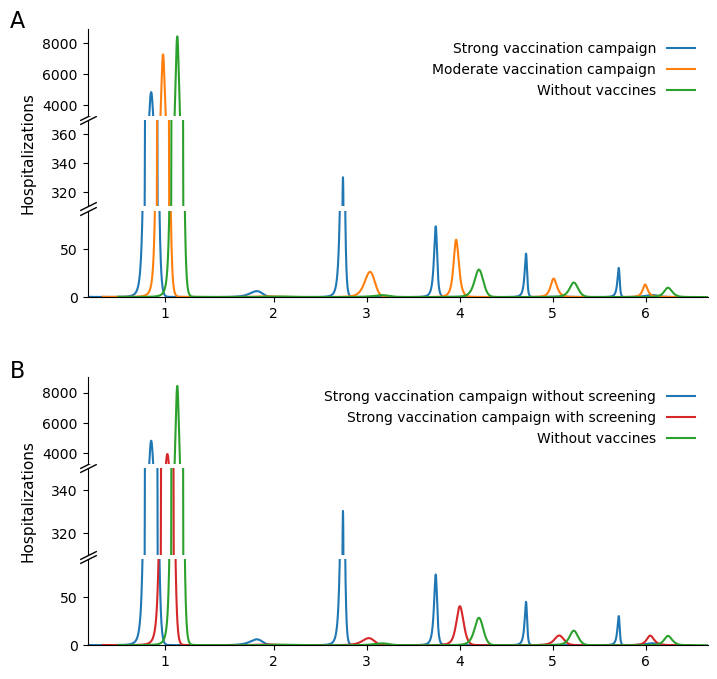

In [11]:
from abc import update_abstractmethods
#Extract variables from solution
Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_vax.T
Hospitalizations_vax = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)
Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_novax.T
Hospitalizations_novax = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)
Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_midvax.T
Hospitalizations_midvax = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)

Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_vax_screening.T
Hospitalizations_vax_screening = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)
Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_novax_screening.T
Hospitalizations_novax_screening = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)
Sb, Ib1, Ib2, Rb1, Rb2, Sb1, Sb2, Ib12, Ib21, S, I1, I2, R1, R2, S1, S2, I21, I12, Sv, Iv1, Iv2, Se, Ie1, Ie2, Re1, Re2, Se1, Se2, Ie12, Ie21, R = solution_midvax_screening.T
Hospitalizations_midvax_screening = np.sum([Ib12,Ib21,I12,I21,Iv1,Iv2,Ie12,Ie21], axis=0)

fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(hspace=0.3)
#make outer gridspec
outer = GridSpec(2, 1)
#make nested gridspecs
gs1 = GridSpecFromSubplotSpec(3, 1, subplot_spec = outer[0], hspace = .05)
gs2 = GridSpecFromSubplotSpec(3, 1, subplot_spec = outer[1], hspace = .05)

decalage = 2000

ax = plt.subplot(gs1[1])
ax.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign')
ax.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_midvax[decalage:], label='Moderate vaccination campaign')
ax.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Outbreaks')
ax.set_xlim([0,40])
ax.set_ylim([310,370])
ax.tick_params(bottom=False, labelbottom=False)

ax2 = plt.subplot(gs1[0])
ax2.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign')
ax2.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_midvax[decalage:], label='Moderate vaccination campaign')
ax2.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlim([0,40])
ax2.set_ylim([3300,8900])
ax2.tick_params(bottom=False, labelbottom=False)
ax2.legend(frameon=False, markerfirst=False)

ax4 = plt.subplot(gs1[2])
ax4.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign')
ax4.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_midvax[decalage:], label='Moderate vaccination campaign')
ax4.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlim([0,40])
ax4.set_ylim([0,90])
ax4.set_xticks([5,12,18,24,30,36])
ax4.set_xticklabels([1,2,3,4,5,6])

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot(0, 1, transform=ax.transAxes, **kwargs)
ax.plot(0, 0, transform=ax2.transAxes, **kwargs)
ax4.plot(0, 1, transform=ax4.transAxes, **kwargs)
ax4.plot(0, 0, transform=ax.transAxes, **kwargs)

ax1 = plt.subplot(gs2[1])
ax1.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign without screening')
ax1.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_vax_screening[decalage:], label='Strong vaccination campaign with screening', color='#d62728')
ax1.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines', color='#2ca02c')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Outbreaks')
ax1.set_xlim([0,40])
ax1.set_ylim([310,350])
ax1.tick_params(bottom=False, labelbottom=False)


ax3 = plt.subplot(gs2[0])
ax3.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign without screening')
ax3.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_vax_screening[decalage:], label='Strong vaccination campaign with screening', color='#d62728')
ax3.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines', color='#2ca02c')
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlim([0,40])
ax3.set_ylim([3300,9000])
ax3.tick_params(bottom=False, labelbottom=False)
ax3.legend(frameon=False, markerfirst=False)

ax5 = plt.subplot(gs2[2])
ax5.plot(t[:-decalage], Hospitalizations_vax[decalage:], label='Strong vaccination campaign')
ax5.plot(t[int(decalage/2):-int(decalage/2)], Hospitalizations_vax_screening[decalage:], label='Strong vaccination campaign with screening', color='#d62728')
ax5.plot(t[decalage:], Hospitalizations_novax[decalage:], label='Without vaccines', color='#2ca02c')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xlim([0,40])
ax5.set_ylim([0,90])
ax5.set_xticks([5,12,18,24,30,36])
ax5.set_xticklabels([1,2,3,4,5,6])

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot(0, 1, transform=ax1.transAxes, **kwargs)
ax1.plot(0, 0, transform=ax3.transAxes, **kwargs)
ax5.plot(0, 1, transform=ax5.transAxes, **kwargs)
ax5.plot(0, 0, transform=ax1.transAxes, **kwargs)

ax2.text(-5,9000,'A', size=16)
ax4.text(-4.3,90,'Hospitalizations', size=11, rotation=90)
ax3.text(-5,9000,'B', size=16)
ax5.text(-4.3,90,'Hospitalizations', size=11, rotation=90)

#fig.savefig('Morvan et al figure_5.tif', dpi=96)